In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# First step will be to import the feature data and the labels
data_path = "C:/Users/biapt/Documents/full_wei_data.csv";
data = pd.read_csv(data_path)
# here what everything means:
'''
frequencies = {"alpha"};
epochs = {'ec1','if5','emf5','eml5','ec3'};
graph = {"aec","pli"}
The ids we see are mapping to these
'''
data

,p_id,frequency,epoch,graph,window,mean_1,mean_2,mean_3,mean_4,mean_5,...,clust_coeff_ 77,clust_coeff_ 78,clust_coeff_ 79,clust_coeff_ 80,clust_coeff_ 81,clust_coeff_ 82,norm_avg_clust_coeff,norm_g_eff,community,small_worldness
0,1,1,1,0,1,0.214410,0.206480,0.186960,0.095920,0.185300,...,0.111200,0.127020,0.102430,0.137680,0.151390,0.101670,0.99897,0.97336,0.147250,0.95888
1,1,1,1,1,1,0.135180,0.133150,0.066425,0.142670,0.187410,...,0.106720,0.128150,0.104750,0.105940,0.094395,0.109470,0.99442,0.97609,0.117070,0.95943
2,1,1,1,0,2,0.173520,0.176050,0.207510,0.196660,0.100010,...,0.193260,0.181300,0.098848,0.171360,0.131640,0.119280,0.99763,0.98745,0.083997,0.97921
3,1,1,1,1,2,0.135480,0.110920,0.099013,0.136760,0.166900,...,0.091389,0.103490,0.113290,0.102150,0.087017,0.120590,0.99338,0.98542,0.119380,0.96962
4,1,1,1,0,3,0.090807,0.194400,0.160160,0.122470,0.049862,...,0.115170,0.109680,0.092119,0.157790,0.145170,0.150840,0.99841,0.98561,0.147540,0.97606
5,1,1,1,1,3,0.089552,0.056574,0.085036,0.109230,0.130940,...,0.101490,0.087030,0.086551,0.071742,0.069271,0.094503,0.99216,0.98582,0.110580,0.96761
6,1,1,1,0,4,0.092985,0.167780,0.171060,0.174230,0.075009,...,0.132310,0.112610,0.099264,0.141140,0.116810,0.122770,0.99815,0.98590,0.142180,0.97396
7,1,1,1,1,4,0.056143,0.058897,0.039806,0.064573,0.101440,...,0.108020,0.113390,0.078162,0.068628,0.074071,0.096014,0.99498,0.98338,0.121510,0.97278
8,1,1,1,0,5,0.085757,0.135000,0.094392,0.174200,0.048321,...,0.097576,0.108650,0.116480,0.127690,0.107610,0.087126,0.99925,0.99085,0.142330,0.98124
9,1,1,1,1,5,0.104530,0.089392,0.081475,0.106140,0.129180,...,0.085813,0.122850,0.074097,0.087794,0.088316,0.095469,0.99460,0.98725,0.119500,0.97627


In [14]:
# We will keep the same structure than we did in the AEC vs wPLI project for the machine learning
# Machine Learning 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

# Sklearn utils
from sklearn.base import clone
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# Classifier selections
clfs = [LinearDiscriminantAnalysis(solver='svd'), SVC(kernel='linear', C=0.1),SVC(kernel='linear', C=0.5), SVC(kernel='linear', C=1.0), SVC(kernel='rbf', C=0.1), SVC(kernel='rbf',C=1.0),RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)]
selected_clf = clfs[2]

def get_subset(data, analysis_type, other_epoch):
    
    # Here we get out the index for this particular purposes
    if analysis_type == 'aec':
        analysis_type = 0
    elif analysis_type == 'wpli':
        analysis_type = 1
        
    # Here we get out the index for a particular epoch
    if other_epoch == 'if5':
        other_epoch = 2
    elif other_epoch == 'emf5':
        other_epoch = 3
    elif other_epoch == 'eml5':
        other_epoch = 4
    elif other_epoch == 'ec3':
        other_epoch = 5
    
    analysis = data['graph'] == analysis_type
    baseline = data['epoch'] == 1 # get the baseline
    other = data['epoch'] == other_epoch
    subset_data = data[analysis & (baseline | other)]
    return subset_data

def classify(dataset, original_clf):
    clf = clone(original_clf)
    # Initialize the Result data structures
    cms = []
    accuracies = []
    reports = []
    for test_id in range(1,10):
        #print("Participant: " + str(test_id) + " in hold-out set:")
        
        # Split the data in a leave one subject out manner
        
        # Get the training and test dataset
        training_dataset = dataset[dataset['p_id'] != test_id]
        test_dataset = dataset[dataset['p_id'] == test_id]
        
        # Get the X and Y 
        X_train = training_dataset.iloc[:,5:]
        y_train = training_dataset['epoch']
        
        # Training the min max normalizer
        min_max_scaler = MinMaxScaler()
        min_max_scaler.fit(X_train)
        X_train = min_max_scaler.transform(X_train)
        
        X_test = test_dataset.iloc[:,5:]
        y_test = test_dataset['epoch']
        
        # Normalize the test set using a training scaler
        X_test = min_max_scaler.transform(X_test)
        
        # Fitting our model
        clf.fit(X_train, y_train)

        # predicting
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        print("Generalization accuracy: " + str(accuracy))
        #print(cm)
        #print(report)
        
        # Saving the results
        cms.append(cm)
        accuracies.append(accuracy)
        reports.append(report)
        
    return (cms,accuracies,reports)


# Choices are:
# aec, wpli
# emf5 (unconscious) and eml5 (pre-ROC)
subset_data = get_subset(data, 'wpli','eml5')
(cms, accuracies, report) = classify(subset_data, selected_clf)
print("Mean accuracy is: " + str(np.mean(accuracies)))

Generalization accuracy: 0.7391304347826086
Generalization accuracy: 0.9565217391304348
Generalization accuracy: 0.6260869565217392
Generalization accuracy: 0.9557522123893806
Generalization accuracy: 0.6896551724137931
Generalization accuracy: 0.9900990099009901
Generalization accuracy: 0.9310344827586207
Generalization accuracy: 0.6448598130841121
Generalization accuracy: 0.9568965517241379
Mean accuracy is: 0.8322262636339797


In [13]:
# Iterating through all the epoch and aggregating all the averages
selected_clf = clfs[2] # goes from 0 to 7
total = 0
analysis_type = ['aec','wpli']
epoch_type = ['if5', 'emf5', 'eml5', 'ec3']
# Iterating through aec and wpli measure
for analysis in analysis_type:
    # Iterate through Induction, Unconscious, pre-ROC and recovery
    for epoch in epoch_type:
        print(analysis)
        print(epoch)
        subset_data = get_subset(data, analysis, epoch)
        (cms, accuracies, report) = classify(subset_data, selected_clf)
        total = total + np.mean(accuracies)
print("Average performance for classifier = " + str(total/8))

aec
if5
0
2
Generalization accuracy: 0.5714285714285714
Generalization accuracy: 0.6347826086956522
Generalization accuracy: 0.5478260869565217
Generalization accuracy: 0.3805309734513274
Generalization accuracy: 0.4827586206896552
Generalization accuracy: 0.6435643564356436
Generalization accuracy: 0.6724137931034483
Generalization accuracy: 0.4727272727272727
Generalization accuracy: 0.5862068965517241
aec
emf5
0
3
Generalization accuracy: 0.9304347826086956
Generalization accuracy: 0.9130434782608695
Generalization accuracy: 0.9130434782608695
Generalization accuracy: 0.911504424778761
Generalization accuracy: 0.7672413793103449
Generalization accuracy: 0.8712871287128713
Generalization accuracy: 0.9310344827586207
Generalization accuracy: 0.8181818181818182
Generalization accuracy: 0.9741379310344828
aec
eml5
0
4
Generalization accuracy: 0.591304347826087
Generalization accuracy: 0.8260869565217391
Generalization accuracy: 0.3652173913043478
Generalization accuracy: 0.7876106194690

## Average Classification Result
- LDA : 0.6650799789491493
- Linear SVM C=0.1 : 0.6850622618599771
- Linear SVM C=0.5 : 0.6852205308138111
- Linear SVM C=1.0 : 0.6842265725506583
- RBF SVM C=0.1 : 0.5581517916164056
- RBF SVM C=1.0 : 0.6448795803208284
- RF n=100, max=2 : 0.6528903224361835

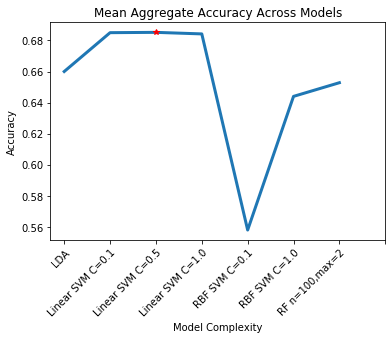

In [15]:
# Generating the figure 
# Visualization
import matplotlib.pyplot as plt
#Helper function
def make_plot(data,title):
    #static data
    models = ["LDA","Linear SVM C=0.1", "Linear SVM C=0.5", "Linear SVM C=1.0", "RBF SVM C=0.1", "RBF SVM C=1.0", "RF n=100,max=2"]
    x = [0,1,2,3,4,5,6]

    # Figure 
    fig = plt.figure()
    ax = plt.axes()

    ax.plot(x, data, linewidth=3)
    ax.plot(2,data[2],'r*')

    ax.set(xticks=np.arange(len(data) + 1),
        # ... and label them with the respective list entries
        xticklabels=models,
        title=title,
        ylabel='Accuracy',
        xlabel='Model Complexity')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

    plt.show()
    
aggregate = [0.66, 0.6850, 0.6852, 0.6842, 0.558, 0.644 ,0.6528]
make_plot(aggregate, "Mean Aggregate Accuracy Across Models")

In [16]:
from math import floor
import pickle
import copy
from sklearn.utils import resample

# Now we need to add in the bootstrap confidence interval and the permutation testing
# Iterate num_bootstrap times and create a classifier with the resampled data
# Then create confidence interval for the and the accuracy, f_1 score
# The p value used here is 0.05
# This means that the lower bound = math.floor((num_bootstrap/100)*2.5)
#                     upper bound = math.floor((num_bootstrap/100)*97.5)
def generate_confidence_interval(original_dataset, clf, num_bootstrap):
    lb_index = floor((num_bootstrap/100)*(2.5))
    ub_index = floor((num_bootstrap/100)*(97.5))

    accuracies = []

    conf_interval_accuracy = (-1,-1)

    # Here we overwrite the dataset X, y and I and run the classify function
    # for each bootstrap samples
    for b_id in range(num_bootstrap):
        print("Bootstrap sample #" + str(b_id))
        # Copy the original dataset before manipulating it
        dataset = copy.deepcopy(original_dataset)

        # Get the sampled with replacement dataset
        resampled_data = resample(dataset)

        # Classify and get the results
        (cms, acc, report) = classify(resampled_data, clf)

        accuracies.append(np.mean(acc))
                          
    # Sort the results
    accuracies.sort()

    # Set the confidence interval at the right index
    conf_interval_accuracy = (accuracies[lb_index],accuracies[ub_index])

    return (accuracies,conf_interval_accuracy)

# Bootstrap experiment setup                          
# Generate confidence interval for the classifier
filename = "wpli_pre_roc"
subset_data = get_subset(data, 'wpli', 'emf5')
num_bootstrap = 5000
(accuracies,conf_interval_accuracy) = generate_confidence_interval(subset_data, selected_clf, num_bootstrap)
print("Confidence interval for Accuracy: " + str(conf_interval_accuracy))
pickle_out = open(filename,"wb")
pickle.dump(accuracies, pickle_out)
pickle_out.close()

Bootstrap sample #0
Generalization accuracy: 0.8333333333333334
Generalization accuracy: 0.8461538461538461
Generalization accuracy: 0.6576576576576577
Generalization accuracy: 0.8679245283018868
Generalization accuracy: 0.7281553398058253
Generalization accuracy: 0.61
Generalization accuracy: 0.9076923076923077
Generalization accuracy: 0.5409836065573771


KeyboardInterrupt: 

In [102]:
# Getting the weights for the classification (the last one are important not the first one)
# Fucntion to get the weights out of the SVM
def get_weight(dataset, original_clf):
    clf = clone(original_clf)
    # Fitting our model
    X_train = dataset.iloc[:,5:]
    y_train = dataset['epoch']

    # Normalize the test set using a training scaler
    # Training the min max normalizer
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(X_train)
    X_train = min_max_scaler.transform(X_train)
    X_train = min_max_scaler.transform(X_train)

    # Fitting our model
    clf.fit(X_train, y_train)

    # get weights
    weights = clf.coef_
    weights = weights[0] # Take the weights as they are, will be doing absolute value later on

    
    #norm_avg_clust_coeff 	norm_g_eff 	community 	small_worldness
    weights_mean = weights[0:82]
    weights_std = weights[82:164]
    weights_clust = weights[164:246]
    weight_avg_clust = weights[246]
    weight_g_eff = weights[247]
    weight_community = weights[248]
    weight_sm = weights[249]
    
    return weights_mean,weights_std,weights_clust,weight_avg_clust,weight_g_eff,weight_community,weight_sm

def find_rank_weight(target, weights):
    i = 0
    for weight in weights:
        if(target <= weight):
            return (i-1)/len(weights)
        i = i + 1
    return i/len(weights)
        
# Get the weights of the linear svm with c=0.5
selected_clf = clfs[2] # 2 was the best
analysis_type = 0 # 0 = aec, 1 = wPLI
epochs_to_keep = [1,3]
analysis = data['graph'] == analysis_type
baseline = data['epoch'] == epochs_to_keep[0]
other = data['epoch'] == epochs_to_keep[1]
subset_data = data[analysis & (baseline | other)]
weights_mean,weights_std,weights_clust,weight_avg_clust,weight_g_eff,weight_community,weight_sm = get_weight(subset_data, selected_clf)


# Try to find the relative importance of the graph feature in importance (%)
all_features = np.concatenate((weights_mean,weights_std),axis=0)
all_features = np.concatenate((all_features,weights_clust),axis=0)
np.append(all_features, [weight_avg_clust])
np.append(all_features, [weight_g_eff])
np.append(all_features, [weight_community])
np.append(all_features, [weight_sm])
all_features.sort()


# sum weights clust coeff
all_rank = 0
for i in range(0,len(weights_clust)):
    all_rank = all_rank + find_rank_weight(weights_clust[i], all_features)
all_rank = all_rank/len(weights_clust)
print("All cluster coefficient: " + str(all_rank))

# weight_avg_clust
rank_avg_clust = find_rank_weight(weight_avg_clust, all_features)
print("Avg Cluster Coefficient: " + str(rank_avg_single_clust))

# weight_g_eff
rank_g_eff = find_rank_weight(weight_g_eff, all_features)
print("Global Efficiency: " + str(rank_g_eff))

# weight_community
rank_community = find_rank_weight(weight_community, all_features)
print("Community: " + str(rank_community))

# weight_sm
rank_sm = find_rank_weight(weight_sm, all_features)
print("Smallworldness: " + str(rank_sm))

# All graph usefulness
usefulness = (rank_avg_clust + rank_g_eff + rank_community + rank_sm)/4
print("Graph usefulness: " + str(usefulness))

IndexError: index 246 is out of bounds for axis 0 with size 86

## Feature weights are hard to understand when not visualizing them
- I don't have time for this now, it would have been nice to have an already made functionality in python to put color on a brain (TODO)
- Will look at the stability of the classification with the graph (per participants)
    
    

In [138]:
# functional connectivity
fct_pli_unc = np.array([0.84,0.89,0.70,0.95,0.66,0.59,0.92,0.54,0.93])
fct_aec_unc = np.array([0.91,0.87,0.87,0.87,0.75,0.80,0.93,0.80,0.93])

fct_pli_prc = np.array([0.70,0.93,0.6,0.90,0.65,0.98,0.90,0.65,0.91])
fct_aec_prc = np.array([0.63,0.80,0.40,0.74,0.64,0.92,0.87,0.74,0.76])

# Graph Theory
gp_pli_unc = np.array([0.83,0.87,0.72,0.91,0.67,0.63,0.93,0.57,0.94])
gp_aec_unc = np.array([0.93,0.91,0.91,0.911,0.76,0.87,0.93,0.81,0.97])

gp_pli_prc = np.array([0.73,0.95,0.62,0.95,0.68,0.99,0.93,0.64,0.95])
gp_aec_prc = np.array([0.59,0.82,0.36,0.78,0.68,0.91,0.90,0.72,0.75])

# Check Mean and std
print("PLI Unconscious")
print("FC:" + str(np.mean(fct_pli_unc)) + str(np.std(fct_pli_unc)))
print("GP:" + str(np.mean(gp_pli_unc)) + str(np.std(gp_pli_unc)))
print("PLI pre-ROC")
print("FC:" + str(np.mean(fct_pli_prc)) + str(np.std(fct_pli_prc)))
print("GP:" + str(np.mean(gp_pli_prc)) + str(np.std(gp_pli_prc)))

print("AEC Unconscious")
print("FC:" + str(np.mean(fct_aec_unc)) + str(np.std(fct_aec_unc)))
print("GP:" + str(np.mean(gp_aec_unc)) + str(np.std(gp_aec_unc)))
print("AEC pre-ROC")
print("FC:" + str(np.mean(fct_aec_prc)) + str(np.std(fct_aec_prc)))
print("GP:" + str(np.mean(gp_aec_prc)) + str(np.std(gp_aec_prc)))

# Check Difference
diff_pli_unc = gp_pli_unc - fct_pli_unc
diff_pli_prc = gp_pli_prc - fct_pli_prc

diff_aec_unc = gp_aec_unc - fct_aec_unc
diff_aec_prc = gp_aec_prc - fct_aec_prc

print("PLI")
print(diff_pli_unc)
print(np.mean(diff_pli_unc))
print(diff_pli_prc)
print(np.mean(diff_pli_prc))
print("AEC")
print(diff_aec_unc)
print(np.mean(diff_aec_unc))
print(diff_aec_prc)
print(np.mean(diff_aec_prc))

PLI Unconscious
FC:0.77999999999999990.1495177432800387
GP:0.78555555555555560.13233888410785993
PLI pre-ROC
FC:0.80222222222222220.13998236220465443
GP:0.82666666666666670.1458309523615157
AEC Unconscious
FC:0.85888888888888890.059524867715461664
GP:0.88900000000000010.06194262578296862
AEC pre-ROC
FC:0.72222222222222220.1445896705837114
GP:0.72333333333333330.1602081978759722
PLI
[-0.01 -0.02  0.02 -0.04  0.01  0.04  0.01  0.03  0.01]
0.005555555555555548
[ 0.03  0.02  0.02  0.05  0.03  0.01  0.03 -0.01  0.04]
0.02444444444444443
AEC
[0.02  0.04  0.04  0.041 0.01  0.07  0.    0.01  0.04 ]
0.030111111111111113
[-0.04  0.02 -0.04  0.04  0.04 -0.01  0.03 -0.02 -0.01]
0.0011111111111110998


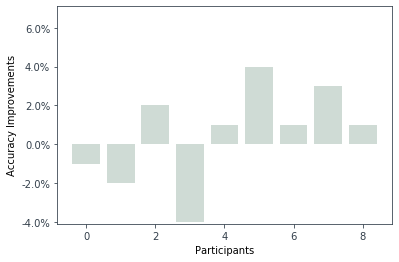

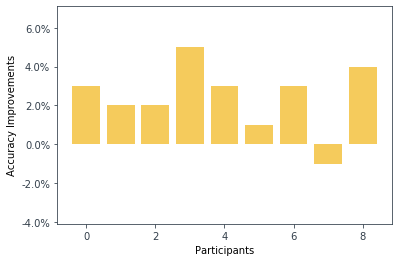

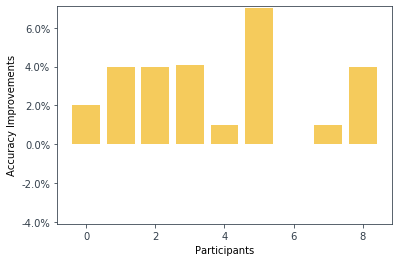

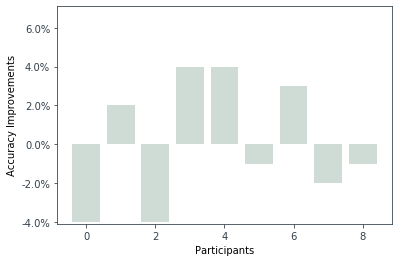

In [164]:
from matplotlib.ticker import FuncFormatter

# Make the plot (4 of them)
def percent(x, pos):
    'The two args are the value and tick position'
    return '%1.1f%s' % (x * 100,'%')


def barplot(data,minimum,maximum,color_t):
    x = np.arange(len(data))
    formatter = FuncFormatter(percent)
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlabel('Participants')
    ax.set_ylabel('Accuracy Improvements')
    ax.set_ylim((minimum, maximum))
    plt.bar(x, data,color=color_t)
    
    plt.show()
    
    
# Setting up the styling
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'


#diff_pli_unc
#diff_pli_prc

#diff_aec_unc
#diff_aec_prc
min_y = -0.041
max_y = 0.071
orange = (255/255,127/255,14/255,1.0)
blue = (31/255,119/255,180/255,1.0)
grey = (207/255, 219/255, 213/255, 1.0)
accent = (245/255, 203/255, 92/255, 1.0)
barplot(diff_pli_unc,min_y,max_y,grey)
barplot(diff_pli_prc,min_y,max_y,accent)
barplot(diff_aec_unc,min_y,max_y,accent)
barplot(diff_aec_prc,min_y,max_y,grey)

In [22]:
import pickle
# Redo the feature weights with mean and std only
# Getting the weights for the classification (the last one are important not the first one)
# Fucntion to get the weights out of the SVM
def get_mean_std_weight(dataset, original_clf):
    clf = clone(original_clf)
    # Fitting our model
    X_train = dataset.iloc[:,5:169] # Here we take only the mean and std features
    y_train = dataset['epoch']

    # Normalize the test set using a training scaler
    # Training the min max normalizer
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(X_train)
    X_train = min_max_scaler.transform(X_train)
    X_train = min_max_scaler.transform(X_train)

    # Fitting our model on the whole dataset
    clf.fit(X_train, y_train)

    # get weights
    weights = clf.coef_[0]

    return weights

# Experiment setup
analysis_type = ['aec','wpli']
epoch_type = ['emf5','eml5']
selected_clf = clfs[2]
folder = "weights_data/" # this is where we want to save our stuff

# Iterate through the analysis type and the epoch type
for analysis in analysis_type:
    for epoch in epoch_type:
        # Generate the weights using the subset data
        subset_data = get_subset(data, analysis, epoch)
        weights = get_mean_std_weight(subset_data, selected_clf)
        
        # Save it at the right spot with the right filename
        filename = folder + analysis_type + '_' + epoch_type + '_weights.mat'
        scipy.io.savemat(filename, mdict={'weights':weights})
        print("Savec: " + filename)



# Saving it for later use



# Need to use this instead
import numpy, scipy.io


SAVED!


array([3.10652911e-01, 3.31722251e-02, 3.98008239e-01, 1.17839402e-02,
       2.26328424e-01, 1.32747627e-01, 2.48137465e-01, 1.84238698e-01,
       8.71224659e-02, 3.57767828e-01, 2.75735726e-02, 1.70584368e-02,
       1.12164901e-01, 3.01957111e-01, 2.09368499e-01, 2.97995327e-01,
       1.77667851e-01, 1.48990754e-01, 4.33723459e-02, 2.74719335e-01,
       2.87265859e-01, 6.07872993e-03, 1.13922100e-01, 3.80422732e-04,
       1.84717778e-01, 1.05292057e-01, 2.70601889e-01, 5.04930738e-01,
       1.12941932e-01, 3.93741184e-01, 1.69168965e-01, 7.50065458e-04,
       1.38020917e-02, 3.06377780e-01, 1.88959640e-01, 2.20756218e-02,
       1.47606653e-01, 8.45814005e-02, 1.14540891e-01, 1.86618221e-01,
       3.83001551e-01, 1.63427981e-01, 2.80085077e-01, 9.72140254e-02,
       4.62488942e-01, 2.23420065e-01, 2.48333987e-01, 6.23908585e-02,
       1.34724667e-01, 8.25459124e-02, 6.20617341e-01, 6.62362732e-02,
       5.89069298e-02, 3.62750730e-01, 2.49368963e-01, 7.76407918e-02,
      